In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_classification
from time import time
from sklearn import metrics

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
c=[1,5,10,20,30,40,50,60,70,80,90,100,1000]
for i in c:
  svm_linear = SVC(kernel='linear', C=i)
  svm_linear.fit(X, y)
  print(f'C={i} {svm_linear.coef_}')

C=1 [[-0.90215515  2.15540106]]
C=5 [[-1.84463184  4.04999787]]
C=10 [[-2.12737347  4.67288335]]
C=20 [[-2.26964391  5.58222868]]
C=30 [[-2.49920793  6.14683189]]
C=40 [[-2.49920793  6.14683189]]
C=50 [[-2.49920793  6.14683189]]
C=60 [[-2.49920793  6.14683189]]
C=70 [[-2.49920793  6.14683189]]
C=80 [[-2.49920793  6.14683189]]
C=90 [[-2.49920793  6.14683189]]
C=100 [[-2.49920793  6.14683189]]
C=1000 [[-2.49920793  6.14683189]]


In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

[0]


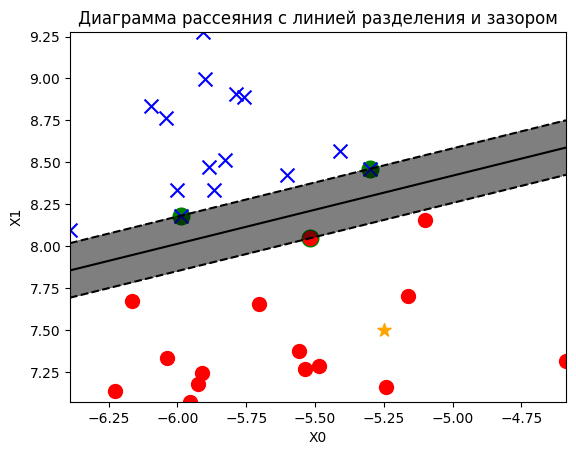

In [ ]:
observation_new = [[-5.25, 7.5]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

[1]


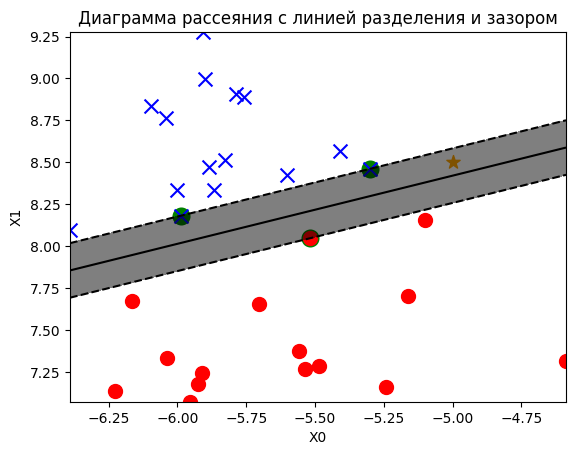

In [ ]:
observation_new = [[-5, 8.5]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

[0]


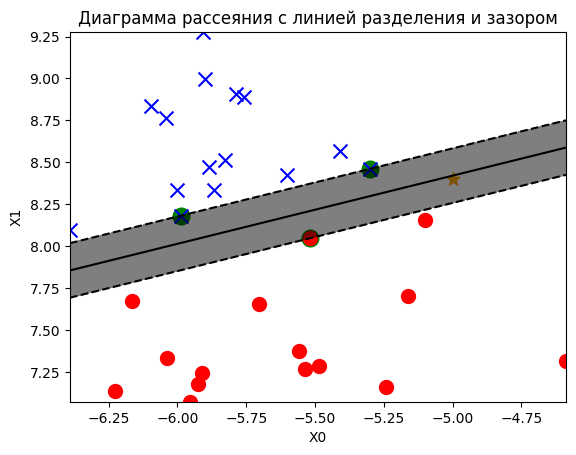

In [ ]:
observation_new = [[-5, 8.4]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


 linear

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


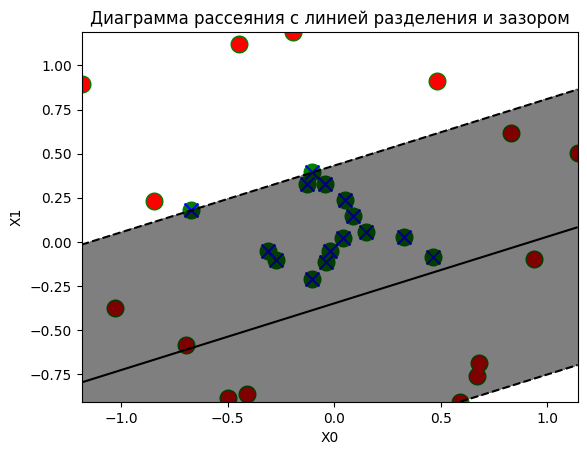


 poly

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


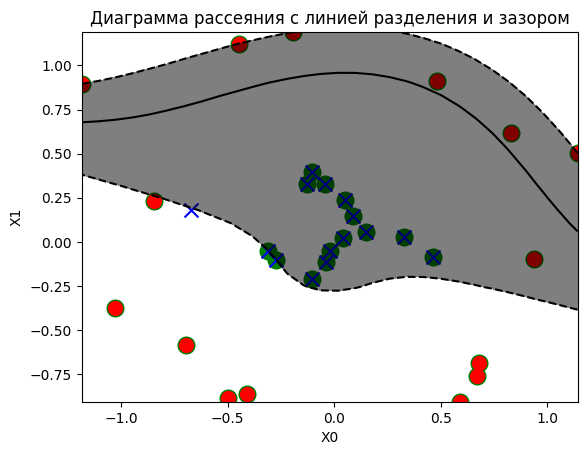


 rbf

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


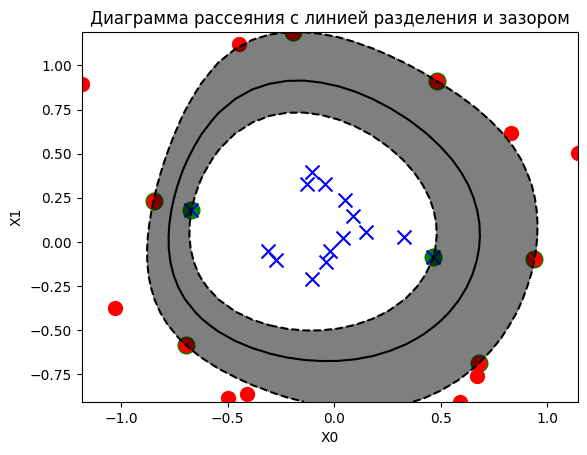


 sigmoid

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


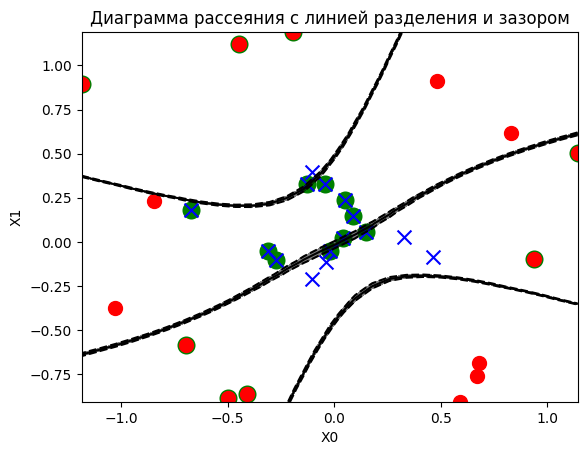

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
   X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
   svm_rbf = SVC(kernel=kernel, C=100).fit(X, y)
   print('\n',kernel)
   print(f'\naccuracy_score: {accuracy_score(y, y_pred)}')
   print(f'\nconfusion_matrix: \n{metrics.confusion_matrix(y, y_pred)}')
   plot_decision_regions(X, y, svm_rbf)